In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# Read all StreamingHistory files into pandas dataframes
df_stream0 = pd.read_json('endsong/endsong_0.json')
df_stream1 = pd.read_json('endsong/endsong_1.json')
df_stream2 = pd.read_json('endsong/endsong_2.json')
df_stream3 = pd.read_json('endsong/endsong_3.json')
df_stream4 = pd.read_json('endsong/endsong_4.json')
df_stream5 = pd.read_json('endsong/endsong_5.json')
df_stream6 = pd.read_json('endsong/endsong_6.json')
df_stream7 = pd.read_json('endsong/endsong_7.json')
df_stream8 = pd.read_json('endsong/endsong_8.json')
df_stream9 = pd.read_json('endsong/endsong_9.json')
df_stream10 = pd.read_json('endsong/endsong_10.json')
df_stream11 = pd.read_json('endsong/endsong_11.json')
df_stream12 = pd.read_json('endsong/endsong_12.json')
df_stream13 = pd.read_json('endsong/endsong_13.json')
df_stream14 = pd.read_json('endsong/endsong_14.json')
df_stream15 = pd.read_json('endsong/endsong_15.json')
df_stream16 = pd.read_json('endsong/endsong_16.json')
df_stream17 = pd.read_json('endsong/endsong_17.json')
df_stream18 = pd.read_json('endsong/endsong_18.json')
df_stream19 = pd.read_json('endsong/endsong_19.json')
df_stream20 = pd.read_json('endsong/endsong_20.json')
df_stream21 = pd.read_json('endsong/endsong_21.json')
df_stream22 = pd.read_json('endsong/endsong_22.json')
df_stream23 = pd.read_json('endsong/endsong_23.json')
df_stream24 = pd.read_json('endsong/endsong_24.json')
df_stream25 = pd.read_json('endsong/endsong_25.json')
df_stream26 = pd.read_json('endsong/endsong_26.json')
df_stream27 = pd.read_json('endsong/endsong_27.json')
df_stream28 = pd.read_json('endsong/endsong_28.json')

# merge streaming dataframes
df_stream = pd.concat([df_stream0, df_stream1,df_stream2,df_stream3,df_stream4,df_stream5,df_stream6 ,df_stream7,df_stream8,
                       df_stream9,df_stream10,df_stream11,df_stream12,df_stream13,df_stream14,df_stream15,df_stream16,
                       df_stream17,df_stream18,df_stream19,df_stream20,df_stream21,df_stream22,df_stream23,df_stream24
                       ,df_stream25 ,df_stream26 ,df_stream27,df_stream28 
])

# droping some unnecessary columns
df_stream = df_stream.drop(['username','platform','conn_country','ip_addr_decrypted','user_agent_decrypted','episode_name','episode_show_name',
             'spotify_episode_uri','reason_start','reason_end','shuffle','offline','offline_timestamp','incognito_mode','skipped'], axis=1)

# renaming columns for better understanding
df_stream.rename(columns={'master_metadata_track_name': 'trackName', 'master_metadata_album_artist_name': 'artistName',
                   'master_metadata_album_album_name':'albumName','spotify_track_uri':'trackUri'}, inplace=True)

df_stream.head()

,ts,ms_played,trackName,artistName,albumName,trackUri
0,2015-04-29T22:34:28Z,127883,All That,Carly Rae Jepsen,All That,spotify:track:53AmR9LVl8UWHkywW7vcRH
1,2015-04-29T22:34:55Z,0,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6
2,2015-04-29T22:34:56Z,0,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6
3,2015-04-29T22:34:56Z,0,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6
4,2015-04-29T22:34:57Z,0,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6


In [3]:
# creating a UniqueID for all songs with the artist and song name
df_stream['UniqueID'] = df_stream['artistName'] + ":" + df_stream['trackName']

In [4]:
# droping duplicates columns
df_stream = df_stream.drop_duplicates(keep='first')

df_stream.head()

,ts,ms_played,trackName,artistName,albumName,trackUri,UniqueID
0,2015-04-29T22:34:28Z,127883,All That,Carly Rae Jepsen,All That,spotify:track:53AmR9LVl8UWHkywW7vcRH,Carly Rae Jepsen:All That
1,2015-04-29T22:34:55Z,0,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6,Carly Rae Jepsen:I Really Like You
2,2015-04-29T22:34:56Z,0,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6,Carly Rae Jepsen:I Really Like You
4,2015-04-29T22:34:57Z,0,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6,Carly Rae Jepsen:I Really Like You
7,2015-04-29T22:43:30Z,0,Where Are Ü Now (with Justin Bieber),Jack Ü,Skrillex and Diplo present Jack Ü,spotify:track:66hayvUbTotekKU3H4ta1f,Jack Ü:Where Are Ü Now (with Justin Bieber)


In [5]:
df_stream.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465796 entries, 0 to 2932
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ts          465796 non-null  object
 1   ms_played   465796 non-null  int64 
 2   trackName   455807 non-null  object
 3   artistName  455807 non-null  object
 4   albumName   455807 non-null  object
 5   trackUri    455807 non-null  object
 6   UniqueID    455807 non-null  object
dtypes: int64(1), object(6)
memory usage: 28.4+ MB


In [6]:
# creating a new column 'Time' and extracting some info like the year, month, weekdays

df_stream["Time"]= pd.to_datetime(df_stream["ts"]) 

df_stream['year'] = pd.DatetimeIndex(df_stream["Time"]).year 
df_stream['month'] = pd.DatetimeIndex(df_stream["Time"]).month 
df_stream['weekday'] = pd.DatetimeIndex(df_stream["Time"]).weekday 
df_stream['day-name'] = df_stream["Time"].dt.day_name()

# controls the amount of times the song was heard
df_stream['Count'] = 1  

In [7]:
df_stream.head()

,ts,ms_played,trackName,artistName,albumName,trackUri,UniqueID,Time,year,month,weekday,day-name,Count
0,2015-04-29T22:34:28Z,127883,All That,Carly Rae Jepsen,All That,spotify:track:53AmR9LVl8UWHkywW7vcRH,Carly Rae Jepsen:All That,2015-04-29 22:34:28+00:00,2015,4,2,Wednesday,1
1,2015-04-29T22:34:55Z,0,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6,Carly Rae Jepsen:I Really Like You,2015-04-29 22:34:55+00:00,2015,4,2,Wednesday,1
2,2015-04-29T22:34:56Z,0,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6,Carly Rae Jepsen:I Really Like You,2015-04-29 22:34:56+00:00,2015,4,2,Wednesday,1
4,2015-04-29T22:34:57Z,0,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6,Carly Rae Jepsen:I Really Like You,2015-04-29 22:34:57+00:00,2015,4,2,Wednesday,1
7,2015-04-29T22:43:30Z,0,Where Are Ü Now (with Justin Bieber),Jack Ü,Skrillex and Diplo present Jack Ü,spotify:track:66hayvUbTotekKU3H4ta1f,Jack Ü:Where Are Ü Now (with Justin Bieber),2015-04-29 22:43:30+00:00,2015,4,2,Wednesday,1


In [8]:
# converting the values in the ms_played column to a timedelta
df_stream["Time-Played (hh:mm:ss)"] = pd.to_timedelta(df_stream["ms_played"], unit='ms')

In [9]:
# calculates the duration of ms_played in minutes
df_stream["Minutes Listening"] = (df_stream["Time-Played (hh:mm:ss)"].dt.total_seconds() / 60).round(3)
df_stream.head()

,ts,ms_played,trackName,artistName,albumName,trackUri,UniqueID,Time,year,month,weekday,day-name,Count,Time-Played (hh:mm:ss),Minutes Listening
0,2015-04-29T22:34:28Z,127883,All That,Carly Rae Jepsen,All That,spotify:track:53AmR9LVl8UWHkywW7vcRH,Carly Rae Jepsen:All That,2015-04-29 22:34:28+00:00,2015,4,2,Wednesday,1,0 days 00:02:07.883000,2.131
1,2015-04-29T22:34:55Z,0,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6,Carly Rae Jepsen:I Really Like You,2015-04-29 22:34:55+00:00,2015,4,2,Wednesday,1,0 days 00:00:00,0.000
2,2015-04-29T22:34:56Z,0,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6,Carly Rae Jepsen:I Really Like You,2015-04-29 22:34:56+00:00,2015,4,2,Wednesday,1,0 days 00:00:00,0.000
4,2015-04-29T22:34:57Z,0,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6,Carly Rae Jepsen:I Really Like You,2015-04-29 22:34:57+00:00,2015,4,2,Wednesday,1,0 days 00:00:00,0.000
7,2015-04-29T22:43:30Z,0,Where Are Ü Now (with Justin Bieber),Jack Ü,Skrillex and Diplo present Jack Ü,spotify:track:66hayvUbTotekKU3H4ta1f,Jack Ü:Where Are Ü Now (with Justin Bieber),2015-04-29 22:43:30+00:00,2015,4,2,Wednesday,1,0 days 00:00:00,0.000


In [10]:
# droping unnecessary columns
df_stream.drop(columns=["ts","ms_played"], inplace=True)
df_stream.head()

,trackName,artistName,albumName,trackUri,UniqueID,Time,year,month,weekday,day-name,Count,Time-Played (hh:mm:ss),Minutes Listening
0,All That,Carly Rae Jepsen,All That,spotify:track:53AmR9LVl8UWHkywW7vcRH,Carly Rae Jepsen:All That,2015-04-29 22:34:28+00:00,2015,4,2,Wednesday,1,0 days 00:02:07.883000,2.131
1,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6,Carly Rae Jepsen:I Really Like You,2015-04-29 22:34:55+00:00,2015,4,2,Wednesday,1,0 days 00:00:00,0.000
2,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6,Carly Rae Jepsen:I Really Like You,2015-04-29 22:34:56+00:00,2015,4,2,Wednesday,1,0 days 00:00:00,0.000
4,I Really Like You,Carly Rae Jepsen,I Really Like You,spotify:track:6YhDHby2eVeENKJNa7C2z6,Carly Rae Jepsen:I Really Like You,2015-04-29 22:34:57+00:00,2015,4,2,Wednesday,1,0 days 00:00:00,0.000
7,Where Are Ü Now (with Justin Bieber),Jack Ü,Skrillex and Diplo present Jack Ü,spotify:track:66hayvUbTotekKU3H4ta1f,Jack Ü:Where Are Ü Now (with Justin Bieber),2015-04-29 22:43:30+00:00,2015,4,2,Wednesday,1,0 days 00:00:00,0.000


In [11]:
df_stream.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465796 entries, 0 to 2932
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   trackName               455807 non-null  object             
 1   artistName              455807 non-null  object             
 2   albumName               455807 non-null  object             
 3   trackUri                455807 non-null  object             
 4   UniqueID                455807 non-null  object             
 5   Time                    465796 non-null  datetime64[ns, UTC]
 6   year                    465796 non-null  int64              
 7   month                   465796 non-null  int64              
 8   weekday                 465796 non-null  int64              
 9   day-name                465796 non-null  object             
 10  Count                   465796 non-null  int64              
 11  Time-Played (hh:mm:ss)  4657

In [12]:
# artists sorted by minutes listening
df_top_artists = df_stream.groupby(["artistName"])[["Minutes Listening","Count"]].sum().sort_values(by="Minutes Listening",ascending=False)
df_top_artists.head(10)

,Minutes Listening,Count
artistName,,
BTS,67873.926,53780
Little Mix,15596.355,14508
Bring Me The Horizon,10710.029,6630
TWICE,9725.952,9254
Twenty One Pilots,9099.183,12647
Lana Del Rey,8089.650,10001
Demi Lovato,7973.598,11554
Ariana Grande,7532.810,10406
TOMORROW X TOGETHER,6401.531,5030


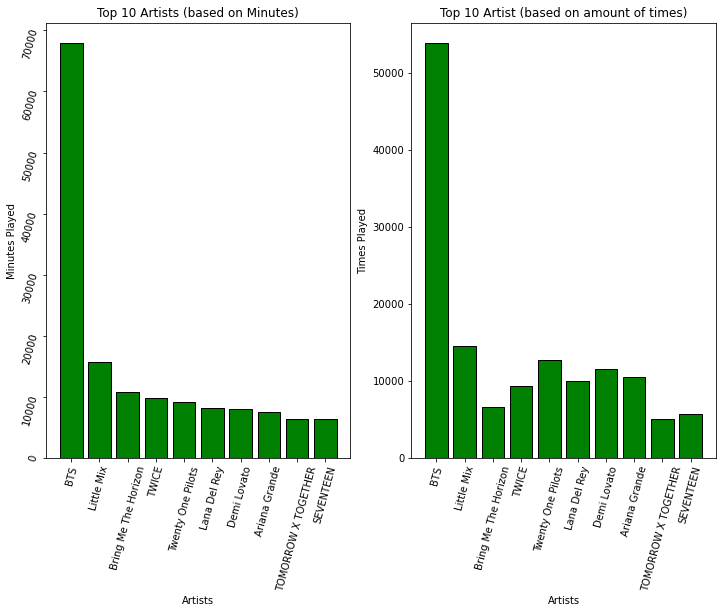

In [13]:
# creating top 10 bar plots for artists based on minutes and amount of times
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

ax1.bar(df_top_artists.head(10).index,df_top_artists["Minutes Listening"].head(10), color='green', edgecolor='black')
ax1.set(title="Top 10 Artists (based on Minutes)",xlabel="Artists",ylabel="Minutes Played")
ax1.tick_params(labelrotation=75)

ax2.bar(df_top_artists.head(10).index,df_top_artists["Count"].head(10),color='green',  edgecolor='black')
ax2.set(title="Top 10 Artist (based on amount of times)",xlabel="Artists",ylabel="Times Played")
plt.xticks(rotation=75)

plt.show()

In [14]:
# songs sorted by minutes listening
df_top_songs_time = df_stream.groupby(["UniqueID"])[["Minutes Listening","Count"]].sum().sort_values(by="Minutes Listening",ascending=False)
# songs sorted by amount of times
df_top_songs_count = df_stream.groupby(["UniqueID"])[["Minutes Listening","Count"]].sum().sort_values(by="Count",ascending=False)

In [15]:
df_top_songs_time.head(10)

,Minutes Listening,Count
UniqueID,,
BTS:Blood Sweat & Tears,2391.519,1199
BTS:Not Today,2026.179,897
The Chainsmokers:Closer,1924.618,717
BTS:FAKE LOVE,1684.520,701
BTS:Butter,1643.773,690
Bring Me The Horizon:medicine,1641.215,572
BTS:Converse High,1634.580,875
BTS:IDOL,1618.643,780
Little Mix:Power,1598.909,710


In [16]:
df_top_songs_count.head(10)

,Minutes Listening,Count
UniqueID,,
BTS:Blood Sweat & Tears,2391.519,1199
MARINA:How to Be a Heartbreaker,1259.730,1090
Halsey:Control,1371.261,960
Troye Sivan:BLUE,926.285,914
BTS:I Need U,1181.856,905
BTS:Not Today,2026.179,897
BTS:Converse High,1634.580,875
BTS:First Love,860.763,858
BTS:Lie,976.249,822


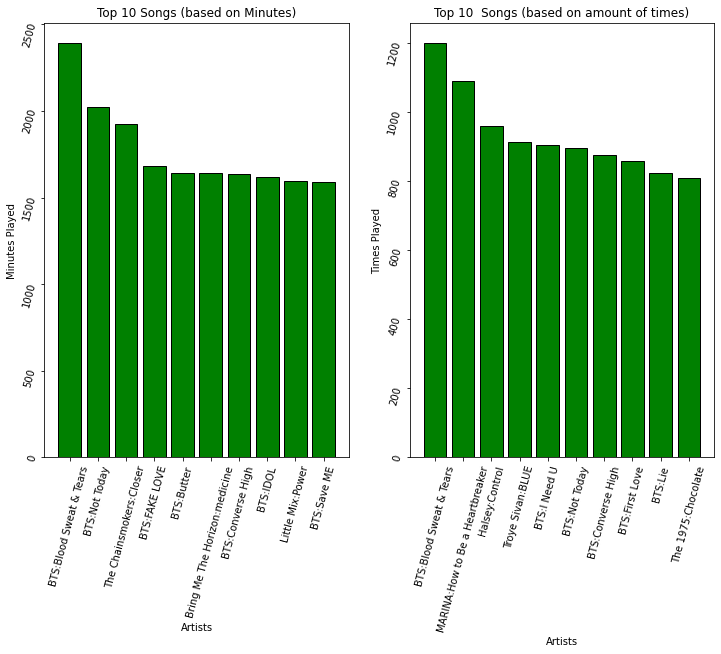

In [17]:
# creating top 10 bar plots for songs based on minutes and amount of times
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))

# Setting up our first graph
ax1.bar(df_top_songs_time.head(10).index,df_top_songs_time["Minutes Listening"].head(10), color='green', edgecolor='black')
ax1.set(title="Top 10 Songs (based on Minutes)",xlabel="Artists",ylabel="Minutes Played");
ax1.tick_params(labelrotation=75);

# Setting up our second graph
ax2.bar(df_top_songs_count.head(10).index,df_top_songs_count["Count"].head(10), color='green', edgecolor='black')
ax2.set(title="Top 10  Songs (based on amount of times)",xlabel="Artists",ylabel="Times Played");
ax2.tick_params(labelrotation=75);

plt.show()

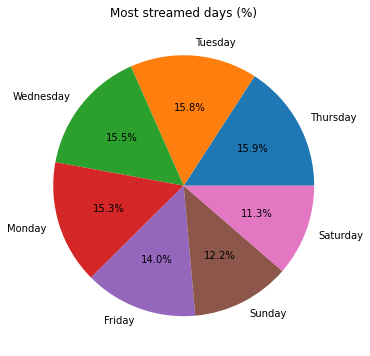

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(df_stream["day-name"].value_counts(), labels=df_stream["day-name"].value_counts().index, autopct='%1.1f%%');
ax.set(title="Most streamed days (%)");

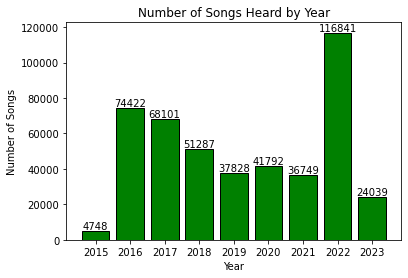

In [19]:
# calculating the amount of songs for each year and creating a bar plot
df_songs_by_year = df_stream.groupby('year')['trackName'].count()

plt.bar(df_songs_by_year.index, df_songs_by_year.values, color='green', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs Heard by Year')

for i, value in enumerate(df_songs_by_year.values):
    plt.text(df_songs_by_year.index[i], value, str(value), ha='center', va='bottom')

plt.xticks(df_songs_by_year.index)

plt.show()

In [20]:
df_top_10_years_by_time = df_stream.groupby(["year"])[["Minutes Listening","Count"]].sum().sort_values(by="Count",ascending=False)
df_top_10_years_by_time.head(10)

,Minutes Listening,Count
year,,
2022,89200.725,116956
2016,61393.595,77046
2017,73418.734,72596
2018,58807.321,52464
2020,51618.192,42241
2019,33191.297,38497
2021,45276.456,37147
2023,23116.182,24039
2015,4156.878,4810


In [21]:
# finding top songs by each year
df_top_songs_by_year = df_stream.groupby(["UniqueID", "year"])[["Minutes Listening", "Count"]].sum()
df_top_songs_by_year = df_top_songs_by_year.sort_values(by=["year", "Count"], ascending=[True, False])


# making it top 5
top_5_songs_by_year = df_top_songs_by_year.groupby("year").head(5).reset_index()

top_5_songs_by_year.head(50)

,UniqueID,year,Minutes Listening,Count
0,Katy Perry:Dark Horse,2015,23.051,48
1,"Jessie J:Flashlight - From ""Pitch Perfect 2"" S...",2015,11.301,41
2,Jessie J:Bang Bang,2015,34.797,37
3,Demi Lovato:Cool for the Summer,2015,54.555,35
4,Katy Perry:Firework,2015,4.301,34
5,Halsey:Control,2016,1034.196,471
6,The Chainsmokers:Closer,2016,1413.913,414
7,BTS:불타오르네 FIRE,2016,1023.193,385
8,BTS:Save ME,2016,984.252,362
9,Melanie Martinez:Mad Hatter,2016,424.647,352


In [22]:
# create an empty dictionary to store the separate dataframes by year
yearly_data = {}

# go over unique years in the year column, filter the top 5 songs for that year and add the year to the dictionary
for year in top_5_songs_by_year['year'].unique():
    year_data = top_5_songs_by_year[top_5_songs_by_year['year'] == year].copy()
    yearly_data[year] = year_data

# printing each df
for year, year_df in yearly_data.items():
    print(f"Year: {year}")
    print(year_df)
    print("\n")

Year: 2015
                                            UniqueID  year  Minutes Listening  \
0                              Katy Perry:Dark Horse  2015             23.051   
1  Jessie J:Flashlight - From "Pitch Perfect 2" S...  2015             11.301   
2                                 Jessie J:Bang Bang  2015             34.797   
3                    Demi Lovato:Cool for the Summer  2015             54.555   
4                                Katy Perry:Firework  2015              4.301   

   Count  
0     48  
1     41  
2     37  
3     35  
4     34  


Year: 2016
                      UniqueID  year  Minutes Listening  Count
5               Halsey:Control  2016           1034.196    471
6      The Chainsmokers:Closer  2016           1413.913    414
7               BTS:불타오르네 FIRE  2016           1023.193    385
8                  BTS:Save ME  2016            984.252    362
9  Melanie Martinez:Mad Hatter  2016            424.647    352


Year: 2017
                                

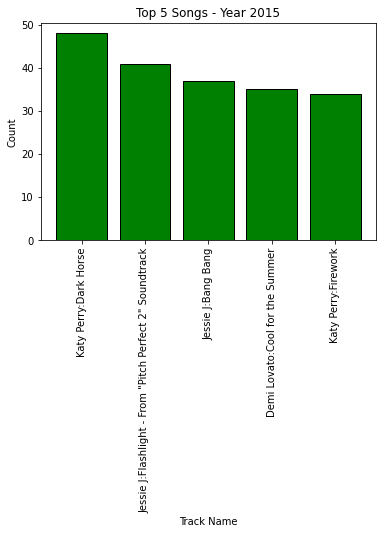

C:\Users\Ana Luiza\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ana Luiza\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ana Luiza\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ana Luiza\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ana Luiza\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ana Luiza\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Gl

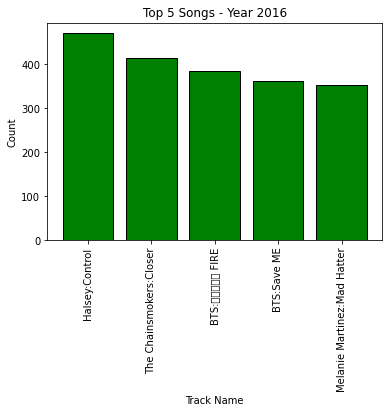

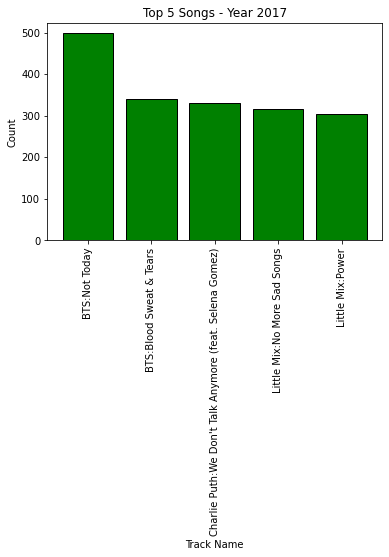

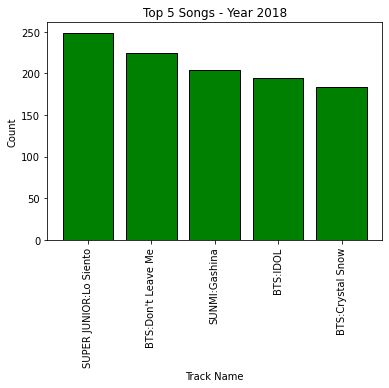

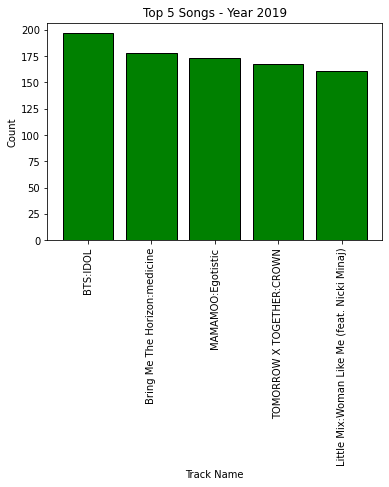

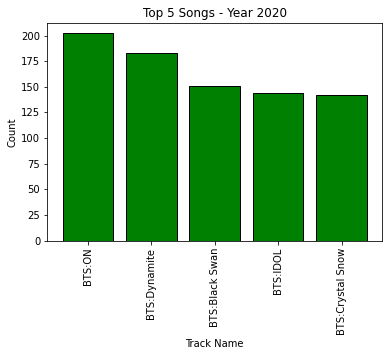

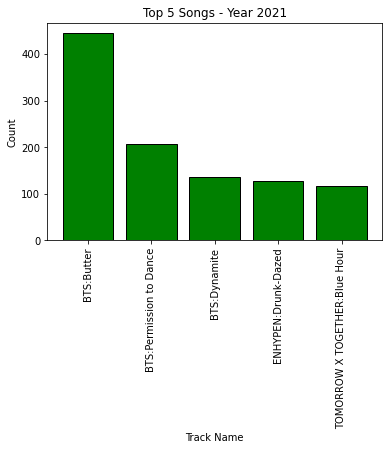

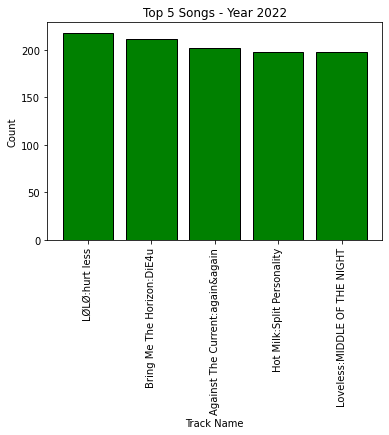

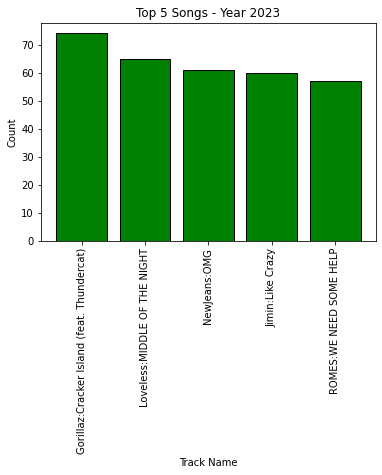

In [23]:
# create one graph by year
for year, year_df in yearly_data.items():
    song_counts = year_df.groupby('UniqueID')['Count'].sum().nlargest(5)
    
    plt.figure()
    plt.bar(song_counts.index, song_counts.values, color='green', edgecolor='black')
    plt.xlabel('Track Name')
    plt.ylabel('Count')
    plt.title(f'Top 5 Songs - Year {year}')
    plt.xticks(rotation=90)
    
    # Display the graph for the current year
    plt.show()


In [24]:
df_stream.to_csv("completeStreaming.csv")

In [25]:
%store df_stream

Stored 'df_stream' (DataFrame)
